 1) Import Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
%matplotlib inline
import matplotlib as mpl
mpl.style.use('ggplot')

2) Upload and Load Dataset in Google Colab

2.1) Upload CSV File from Your Local System

In [5]:
from google.colab import files
uploaded = files.upload()

Saving quikr_car.csv to quikr_car.csv


2.2) Load the CSV File into a DataFrame


In [6]:
df = pd.read_csv('quikr_car.csv')
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


3) Explore the Dataset

3.1)Get General Information About the Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


3.2) View Summary Statistics

In [8]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


3.3) See Column Names

In [9]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

3.4) Check for Missing Values

In [10]:
df.isnull().sum()

,0
name,0
company,0
year,0
Price,0
kms_driven,52
fuel_type,55


3.5) View Categorical columns

In [11]:
df.select_dtypes(include='object').columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

3.6) Plot Distribution of Target Variable(price)

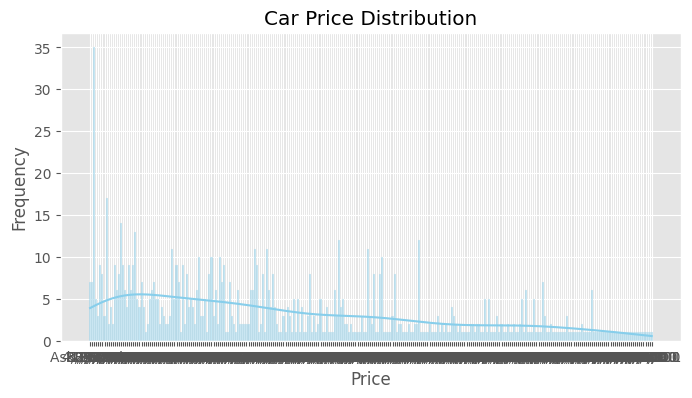

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(df['Price'],kde=True,color='skyblue')
plt.title("Car Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

4) Drop Unnecessary Columns

4.1) Drop Columns That Are Not Useful

In [13]:
df.drop(['name', 'company'],axis=1,inplace=True)

4.2) Confirm the Columns Are Removed

In [14]:
df.columns

Index(['year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

4.3) Clean Price , kms_driven , and year columns

In [15]:
# Filter out rows where 'Price' is 'Ask For Price'
df = df[df['Price'] != 'Ask For Price'].copy()

# Clean 'Price' column
df['Price'] = df['Price'].str.replace('₹', '').str.replace(',', '')
df['Price'] = df['Price'].astype(int)

# Clean 'kms_driven' column and handle non-numeric values
df['kms_driven'] = df['kms_driven'].astype(str).str.replace('kms', '').str.replace(',', '')
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce')

# Clean 'year' column and handle non-numeric values
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Drop rows with NaN values in 'year' or 'kms_driven' after coercion
df.dropna(subset=['year', 'kms_driven'], inplace=True)

# Convert to Int64 after dropping NaNs
df['kms_driven'] = df['kms_driven'].astype('Int64')
df['year'] = df['year'].astype('Int64')

# Correct the typo in kms_driven column name if it exists
if 'km s_driven' in df.columns:
    df.rename(columns={'km s_driven': 'kms_driven'}, inplace=True)

5) Encode Categorical Columns

5.1) Check Categorical Columns

In [16]:
df.select_dtypes(include='object').columns

Index(['fuel_type'], dtype='object')

5.2) Encode Using LabelEncoder

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_cols=['fuel_type']
for col in cat_cols:
  df[col] = le.fit_transform(df[col])

5.3) Verify the Encoding

In [18]:
df.head()

,year,Price,kms_driven,fuel_type
0,2007,80000,45000,2
1,2006,425000,40,0
3,2014,325000,28000,2
4,2014,575000,36000,0
6,2012,175000,41000,0


6)Split the Dataset into Features and target

In [19]:
x = df.drop('Price',axis=1)
y=df['Price']

6.2) Check the Shapes

In [20]:
print("Shape of x:",x.shape)
print("Shape of y:",y.shape)

Shape of x: (817, 3)
Shape of y: (817,)


7) Train-Test Split

7.1) Use train_test_split from scikit-learn

In [21]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

7.2) Check Sizes of Splits

In [22]:
print("Training set size:",x_train.shape)
print("Testing set size:",y_train.shape)

Training set size: (653, 3)
Testing set size: (653,)


8) Train the Model (Random Forest Regressor)

In [23]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)
print("Model training complete!")


Model training complete!


9) Make Predictions

In [26]:
# Make predictions on the test set
y_pred = model.predict(x_test)

# Show first few predicted values
print("🔮 Predicted Prices (sample):", y_pred[:5])

🔮 Predicted Prices (sample): [101962.48666667 140560.08       307745.56746032 623676.65666667
 182169.48      ]


10)Evaluate the Model

In [27]:
print("📊 R2 Score :", round(r2_score(y_test, y_pred), 3))
print("📉 MAE      :", round(mean_absolute_error(y_test, y_pred), 2))
print("📉 RMSE     :", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))


📊 R2 Score : 0.091
📉 MAE      : 253960.66
📉 RMSE     : 733558.31


11) Visualize Actual vs Predicted

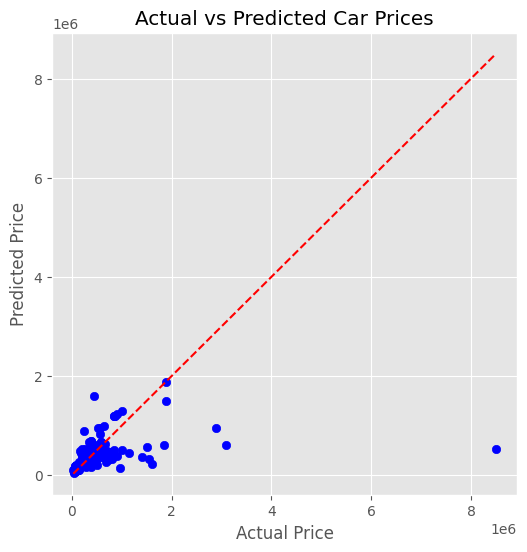

In [28]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()


12)Save the Model (Pickle)


In [29]:
import pickle

with open('car_price_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model saved as car_price_model.pkl")


✅ Model saved as car_price_model.pkl


13)Predict on New Custom Input

In [31]:
new_car = pd.DataFrame([{
    'year': 2018,
    'kms_driven': 30000,
    'fuel_type': 2  # Replace with actual encoded value (like Petrol = 2)
}])

predicted_price = model.predict(new_car)
print("🚗 Predicted Price for New Car: ₹", round(predicted_price[0]))

🚗 Predicted Price for New Car: ₹ 357793
